### Student Information
Name:許誼亭

Student ID:112034561

GitHub ID:vvveat

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

In [1]:
### Begin Assignment Here

In [2]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

# First

## Load DM2023-Lab1-Master Data

In [3]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [4]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

In [5]:
import pandas as pd
# my functions
import helpers.data_mining_helpers as dmh
# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

### Exercise 2 Answer

### Output the specified column

In [6]:
print(X.iloc[5,])

text             From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...
category                                                         3
category_name                               soc.religion.christian
Name: 5, dtype: object


### reverse rows and select 2 rows

In [7]:
print(X[::-1][2:4])

                                                   text  category  \
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   

     category_name  
2254       sci.med  
2253       sci.med  


### Present data at 3 intervals

In [8]:
print(X.iloc[::3])

                                                   text  category  \
0     From: sd345@city.ac.uk (Michael Collier) Subje...         1   
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
6     From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
9     From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   
12    From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...         0   
...                                                 ...       ...   
2244  From: jim.zisfein@factory.com (Jim Zisfein)  S...         2   
2247  From: daniels@math.ufl.edu (TV's Big Dealer) S...         3   
2250  From: ingles@engin.umich.edu (Ray Ingles) Subj...         0   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   

               category_name  
0              comp.graphics  
3     soc.religion.christian  
6     soc.religion.christian  
9                    sci.med  
12              

### Filter the category_name is soc.religion.christian or comp.graphics

In [9]:
print(X[(X['category_name']=="soc.religion.christian") | (X['category_name']=="comp.graphics")])

                                                   text  category  \
0     From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4     From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
...                                                 ...       ...   
2242  From: Sean McMains <mcmains@unt.edu> Subject: ...         1   
2246  From: lmvec@westminster.ac.uk (William Hargrea...         3   
2247  From: daniels@math.ufl.edu (TV's Big Dealer) S...         3   
2248  From: "danny hawrysio" <danny.hawrysio@canrem....         1   
2249  From: shellgate!llo@uu4.psi.com (Larry L. Over...         3   

               category_name  
0              comp.graphics  
1              comp.graphics  
2     soc.religion.christian  
3     soc.religion.christian  
4     soc.religi

### Use "query method" Filter the category_name is soc.religion.christian or comp.graphics

In [10]:
print(X.query('category_name == "soc.religion.christian" or category_name == "comp.graphics"'))

                                                   text  category  \
0     From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4     From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
...                                                 ...       ...   
2242  From: Sean McMains <mcmains@unt.edu> Subject: ...         1   
2246  From: lmvec@westminster.ac.uk (William Hargrea...         3   
2247  From: daniels@math.ufl.edu (TV's Big Dealer) S...         3   
2248  From: "danny hawrysio" <danny.hawrysio@canrem....         1   
2249  From: shellgate!llo@uu4.psi.com (Larry L. Over...         3   

               category_name  
0              comp.graphics  
1              comp.graphics  
2     soc.religion.christian  
3     soc.religion.christian  
4     soc.religi

### Filter the category_name is soc.religion.christian and Revise categories column 

In [11]:
copy_X=X.copy()
mask=copy_X["category_name"]=="soc.religion.christian"
copy_X.loc[mask,"category"]= 500
print(copy_X)

                                                   text  category  \
0     From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...       500   
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...       500   
4     From: stanly@grok11.columbiasc.ncr.com (stanly...       500   
...                                                 ...       ...   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   

               category_name  
0              comp.graphics  
1              comp.graphics  
2     soc.religion.christian  
3     soc.religion.christian  
4     soc.religi

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [12]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df


,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [13]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

### Exercise 5 Answer
According to isnull() method,this function takes a scalar or array-like object and indicates whether values are missing (NaN in numeric arrays, None or NaN in object arrays, NaT in datetimelike).
But the row 2,3,5 in the NA_dict,the word 'NaN'、'None' and '' is string,so isnull() can't work.


In [14]:
NA_df['missing_example'].replace(['NaN','None',''],None).isnull()

0    True
1    True
2    True
3    True
4    True
5    True
Name: missing_example, dtype: bool

### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [15]:
ALL_X=X.copy()
X_sample = ALL_X.sample(n=1000,random_state=42) #random state
display(X_sample)

,text,category,category_name
561,From: ray@engr.LaTech.edu (Bill Ray) Subject: ...,2,sci.med
440,From: jkellett@netcom.com (Joe Kellett) Subjec...,3,soc.religion.christian
1513,From: noring@netcom.com (Jon Noring) Subject: ...,2,sci.med
1360,From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...,3,soc.religion.christian
259,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism
...,...,...,...
1316,From: salaris@niblick.ecn.purdue.edu (Rrrrrrrr...,3,soc.religion.christian
592,From: sandvik@newton.apple.com (Kent Sandvik) ...,0,alt.atheism
1965,From: uad1126@tdc.dircon.co.uk (Robert Palmer)...,3,soc.religion.christian
363,From: mdpyssc@fs1.mcc.ac.uk (Sue Cunningham) S...,1,comp.graphics


### Exercise 6 Answer

1. X_sample INDEX is not in order  
X_sample is random, so the seed needs to be set to fix the sampling for each experiment.

In [16]:
# reset_index
X_sample.reset_index(inplace=True)
X_sample

,index,text,category,category_name
0,561,From: ray@engr.LaTech.edu (Bill Ray) Subject: ...,2,sci.med
1,440,From: jkellett@netcom.com (Joe Kellett) Subjec...,3,soc.religion.christian
2,1513,From: noring@netcom.com (Jon Noring) Subject: ...,2,sci.med
3,1360,From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...,3,soc.religion.christian
4,259,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism
...,...,...,...,...
995,1316,From: salaris@niblick.ecn.purdue.edu (Rrrrrrrr...,3,soc.religion.christian
996,592,From: sandvik@newton.apple.com (Kent Sandvik) ...,0,alt.atheism
997,1965,From: uad1126@tdc.dircon.co.uk (Robert Palmer)...,3,soc.religion.christian
998,363,From: mdpyssc@fs1.mcc.ac.uk (Sue Cunningham) S...,1,comp.graphics


2. change in original X do not alter X_sample's value

In [17]:
ALL_X.loc[561,"text"]="2023"
ALL_X.loc[561:561,:]

,text,category,category_name
561,2023,2,sci.med


In [18]:
X_sample[:1]

,index,text,category,category_name
0,561,From: ray@engr.LaTech.edu (Bill Ray) Subject: ...,2,sci.med


### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

### Exercise 8 Answer

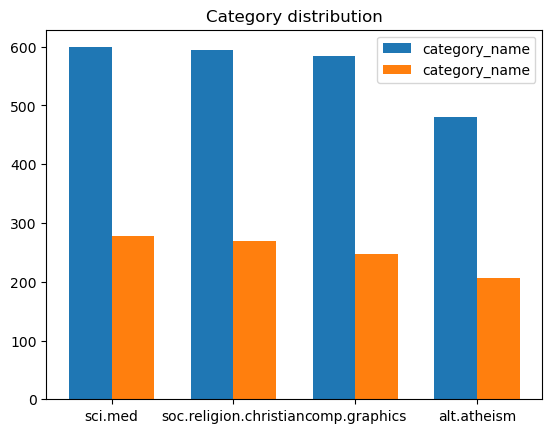

In [19]:
import numpy as np
import matplotlib.pyplot as plt


# 計算每個類別的數量
category_counts = X_sample['category_name'].value_counts()
categories = category_counts.index.tolist()  # 類別名稱的列表
counts = category_counts.tolist()  # 相應計數的列表
category_counts_x = X['category_name'].value_counts()
counts_x = category_counts_x.tolist()

bar_width=0.35
# 建立 x 軸位置的陣列
X_axis = np.arange(len(categories))

midpoints = X_axis + bar_width / 2
plt.xticks(midpoints, categories)

# 繪製長條圖
#plt.figure(figsize=(8,5))
plt.bar(X_axis, counts_x, bar_width, label='category_name')
plt.bar(X_axis+0.35, counts, bar_width, label='category_name')

# 設定 x 軸標籤為類別名稱
plt.xticks(midpoints, categories)


plt.title("Category distribution")
plt.legend()

# 顯示圖表
plt.show()


### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [20]:
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
analyze = count_vect.build_analyzer()
analyze(X.text[0])

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

In [22]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

### Exercise 10 Answer 

In [23]:
vocabX_map_5n100 = pd.DataFrame(X_counts[0:5,0:100].toarray(),columns=count_vect.get_feature_names_out()[:100])
display(vocabX_map_5n100)

,00,000,0000,0000001200,000005102000,0001,000100255pixel,00014,000406,0007,...,02254,022621tan102,023044,0235,0237,024103,024150,024626,025240,025924
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
#建立篩選條件
mask = vocabX_map_5n100.iloc[4,:] == 1
#print(mask)

#篩選資料並呈現答案
vocabX_answer = vocabX_map_5n100.loc[4,list(mask)]
print("Answer:",vocabX_answer.index)

Answer: Index(['00', '01'], dtype='object')


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


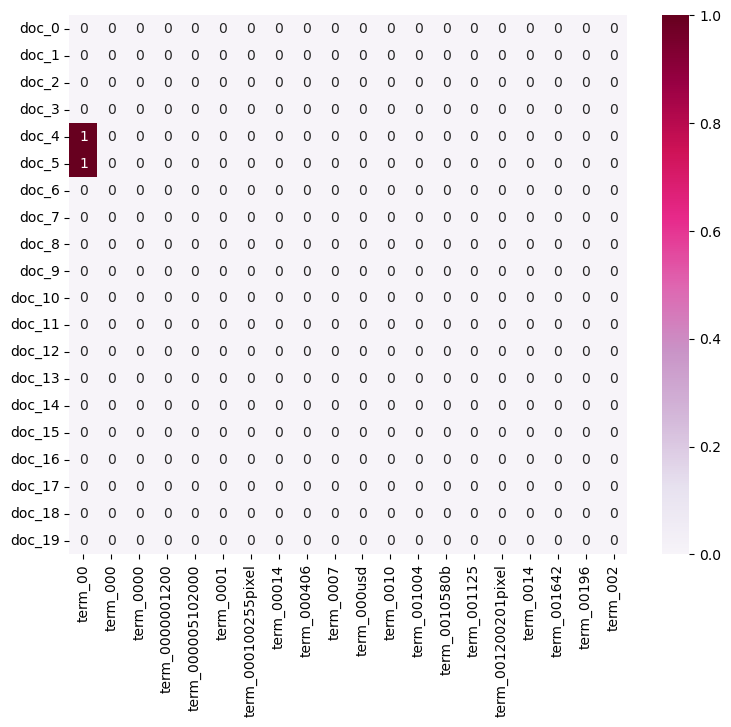

In [25]:
import seaborn as sns
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, 0:20].toarray()


df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

### Exercise 11 Answer

In [26]:
print(X_counts)
print(X_counts.sum(axis=0))

  (0, 14887)	1
  (0, 29022)	1
  (0, 8696)	4
  (0, 4017)	2
  (0, 33256)	2
  (0, 21661)	3
  (0, 9031)	3
  (0, 31077)	1
  (0, 9805)	2
  (0, 17366)	1
  (0, 32493)	4
  (0, 16916)	2
  (0, 19780)	2
  (0, 17302)	2
  (0, 23122)	1
  (0, 25663)	1
  (0, 16881)	1
  (0, 16082)	1
  (0, 23915)	1
  (0, 32142)	5
  (0, 33597)	2
  (0, 20253)	1
  (0, 587)	1
  (0, 12051)	1
  (0, 5201)	1
  :	:
  (2256, 13740)	1
  (2256, 14662)	1
  (2256, 20201)	1
  (2256, 12443)	6
  (2256, 30325)	3
  (2256, 4610)	1
  (2256, 33844)	1
  (2256, 17354)	1
  (2256, 26998)	1
  (2256, 20277)	1
  (2256, 20695)	1
  (2256, 20702)	1
  (2256, 9649)	1
  (2256, 9086)	1
  (2256, 26254)	1
  (2256, 17133)	2
  (2256, 4490)	1
  (2256, 13720)	1
  (2256, 5016)	1
  (2256, 9632)	1
  (2256, 11824)	1
  (2256, 29993)	1
  (2256, 1298)	1
  (2256, 2375)	1
  (2256, 3921)	1
[[134  92   1 ...   1   1   1]]


,00,000,0000001200,0010,008561,01,0100,013657,02,020,...,0l7,10,100,100015,101,1013,10179,102,1024x768,103237
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
284,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
289,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
295,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


Text(220.72222222222223, 0.5, 'Doc')

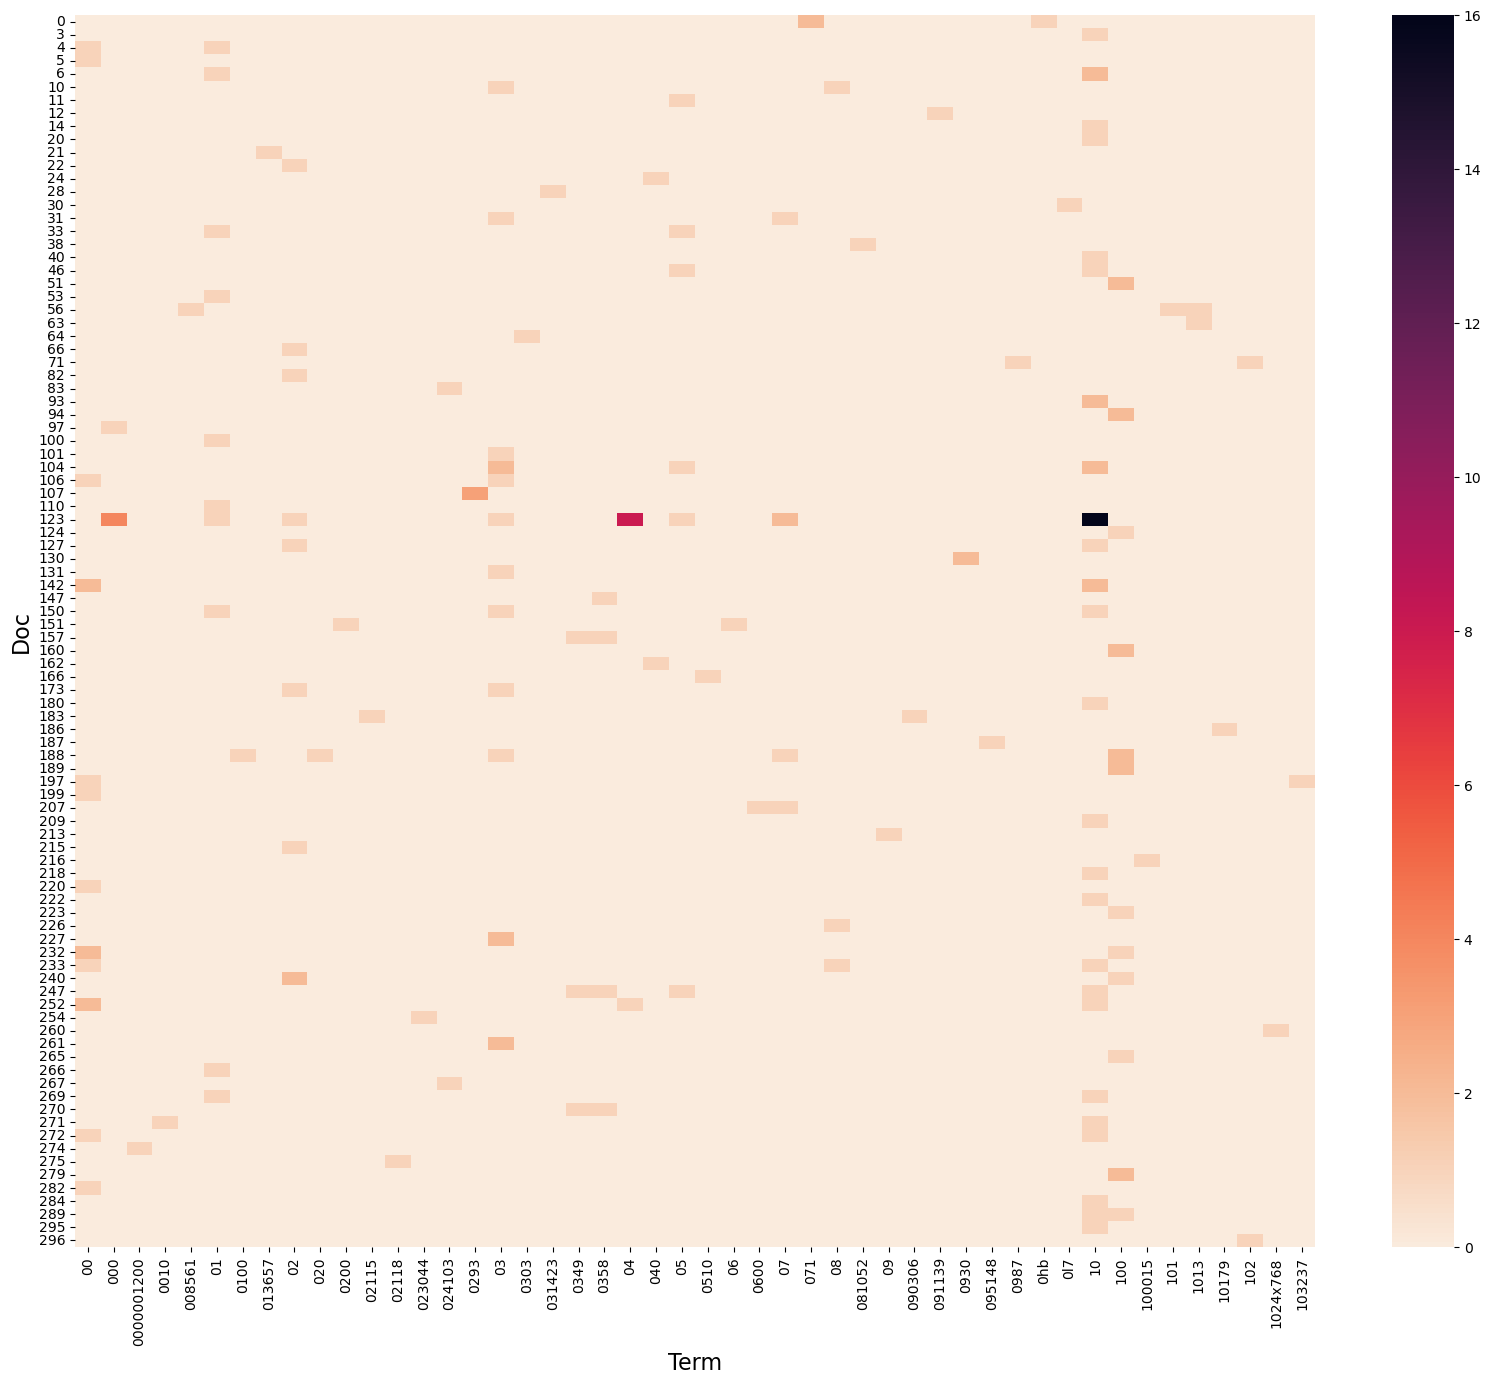

In [27]:
# 使用dataframe來操作
vocabX_map_300n300 = pd.DataFrame(X_counts[:300, 0:300].toarray(), columns=count_vect.get_feature_names_out()[:300])
# display(vocabX_map_300n300)

# 計算每列的加總
column_sums = vocabX_map_300n300.sum(axis=0)  # axis=0 表示對每列進行加總

# 刪除加總為0的列
vocabX_map_300n300.drop(columns=column_sums[column_sums == 0].index, inplace=True)

# 計算每行的加總
row_sums = vocabX_map_300n300.sum(axis=1)  # axis=1 表示對每行進行加總

# 刪除加總為0的行
vocabX_map_300n300.drop(index=row_sums[row_sums == 0].index, inplace=True)

# 打印結果的 DataFrame
display(vocabX_map_300n300)
plt.subplots(figsize=(20, 16))
ax = sns.heatmap(vocabX_map_300n300,
                 cmap="rocket_r",
                 annot=False,xticklabels = True,  yticklabels = True)

# # 設置軸標題
ax.set_xlabel('Term',fontsize=16)
ax.set_ylabel('Doc',fontsize=16)

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

### Exercise 12 Answer

In [28]:
from sklearn.decomposition import PCA
print(X_counts.shape)
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
print(X_reduced.shape)

(2257, 35788)
(2257, 3)


### 角度1

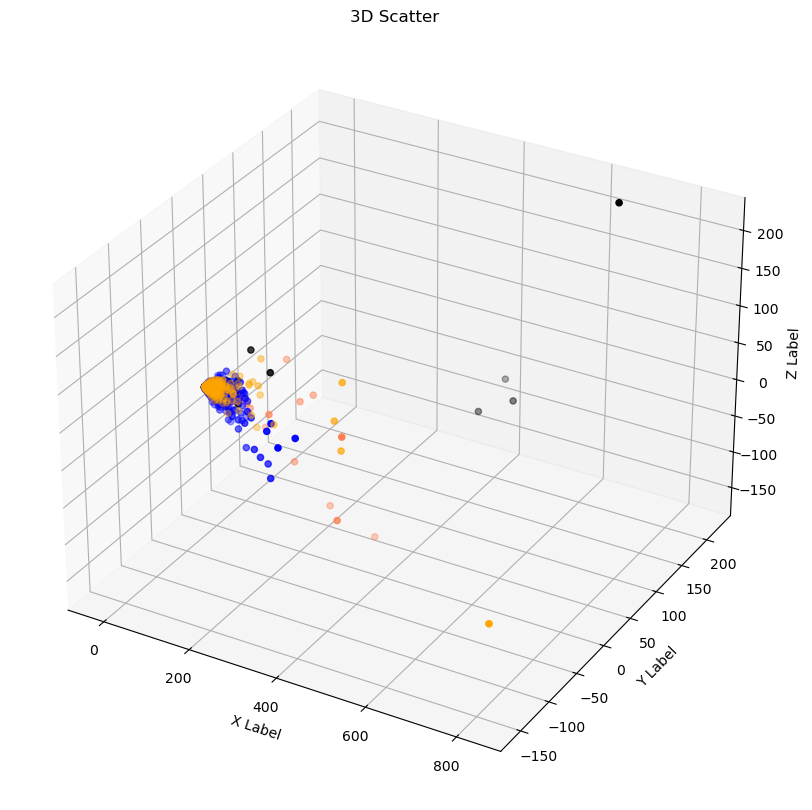

In [29]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]

# 以三個不同角度繪製 3D 散點圖
    
    ax.view_init(30)  # 設定視角

    # 繪製 3D 散點圖
    ax.scatter(xs, ys, zs, c=c)

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.set_title(f'3D Scatter')

plt.show()

### 角度2

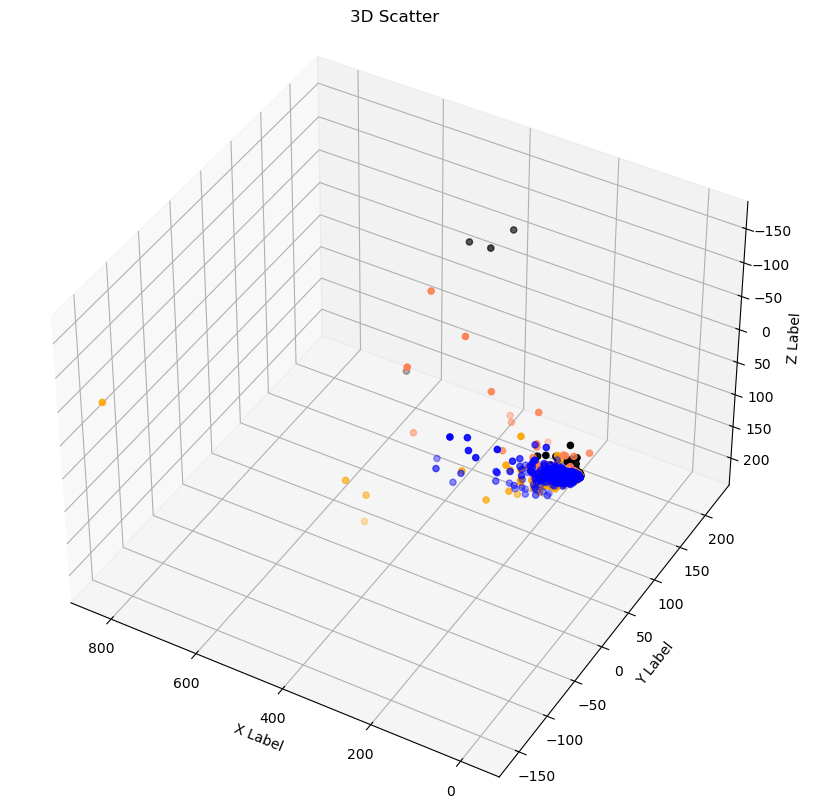

In [30]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]

# 以三個不同角度繪製 3D 散點圖    
    ax.view_init(-140, 60)  # 設定視角

    # 繪製 3D 散點圖
    ax.scatter(xs, ys, zs, c=c)

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.set_title(f'3D Scatter')

plt.show()

### 角度3

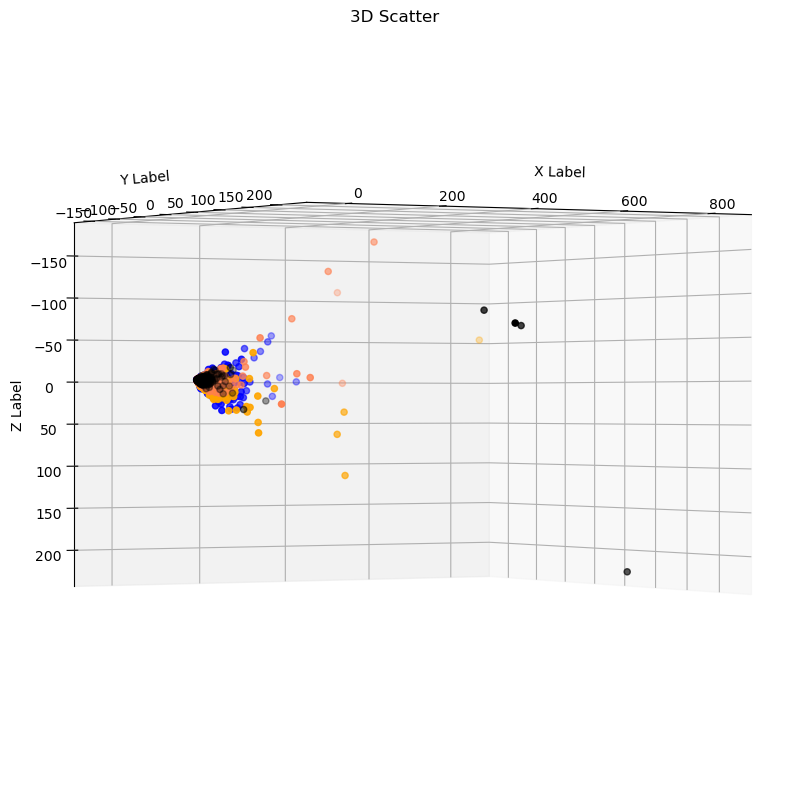

In [31]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]

# 以三個不同角度繪製 3D 散點圖
    ax.view_init(180)  # 設定視角

    # 繪製 3D 散點圖
    ax.scatter(xs, ys, zs, c=c)

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.set_title(f'3D Scatter')

plt.show()

In [32]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

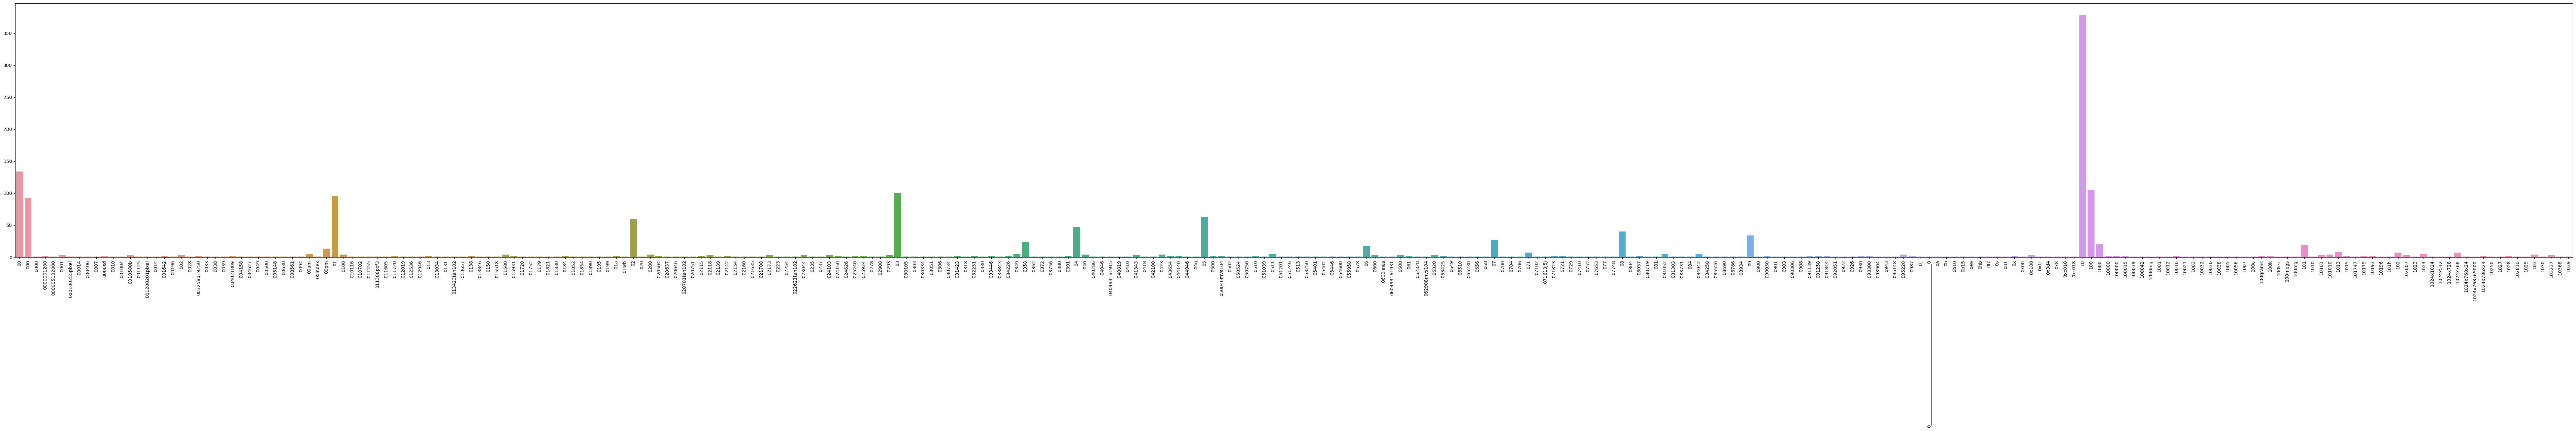

In [33]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

### Exercise 13 Answer

In [34]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [35]:
# Create a DataFrame for the top 300 terms and their frequencies
data = {
    'Terms': count_vect.get_feature_names_out()[:300],
    'Frequencies': term_frequencies[:300]
}

# Create a bar plot using Plotly
fig = px.bar(data, x='Terms', y='Frequencies', labels={'Frequencies': 'Frequency'}, title='Term Frequencies')

# Rotate x-axis labels for better readability
fig.update_layout(xaxis_tickangle=-45)

# Show the plot
fig.show()


### >>> **Exercise 14 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


### Exercise 14 Answer

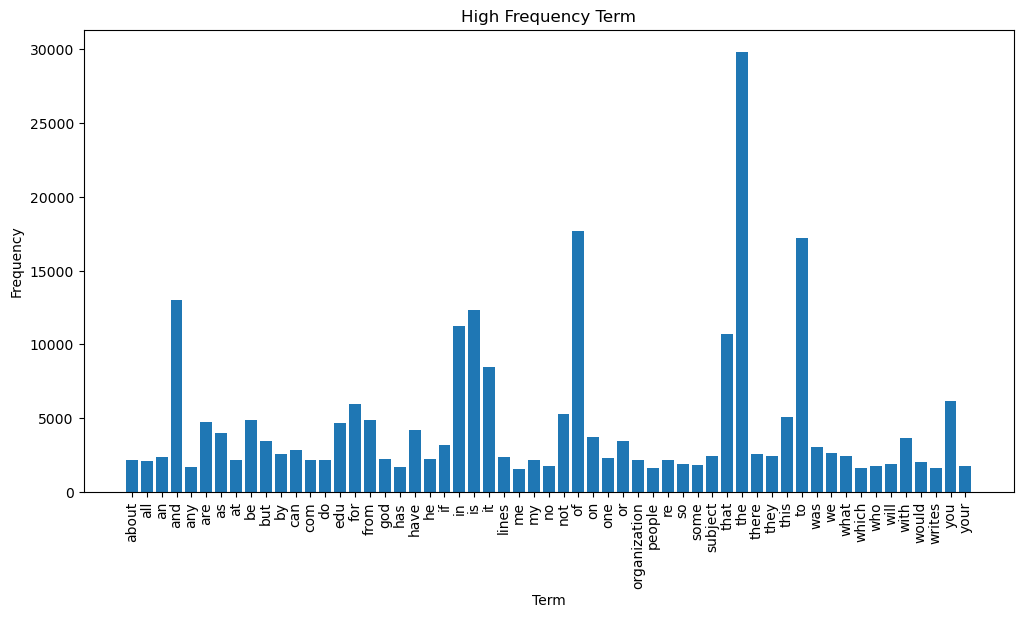

In [36]:
# set frequency threshold
frequency_threshold = 1500

terms = count_vect.get_feature_names_out()
frequencies = term_frequencies

# select the vocabulary that exceeds the frequency threshold 
selected_terms = [terms[i] for i in range(len(terms)) if frequencies[i] > frequency_threshold]
selected_frequencies = [frequencies[i] for i in range(len(frequencies)) if frequencies[i] > frequency_threshold]

plt.figure(figsize=(12, 6))
plt.bar(selected_terms, selected_frequencies)
plt.xlabel('Term')
plt.ylabel('Frequency')
plt.title('High Frequency Term')
plt.xticks(rotation=90)
plt.show()


### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

### Exercise 15 Answer

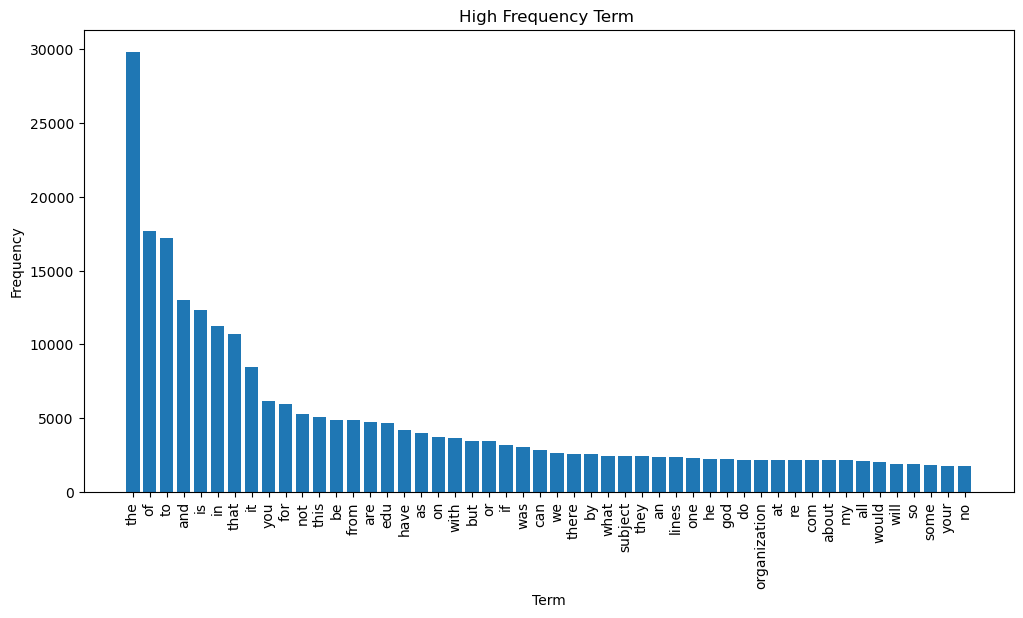

In [37]:
# 選擇50個高頻率出現單詞
num_high_frequency_terms = 50

terms = count_vect.get_feature_names_out()
frequencies = term_frequencies

# 根據頻率降冪排序
sorted_indices = sorted(range(len(frequencies)), key=lambda k: frequencies[k], reverse=True)
sorted_terms = [terms[i] for i in sorted_indices]
sorted_frequencies = [frequencies[i] for i in sorted_indices]

# 選擇高頻率單詞及其出現頻率
selected_terms = sorted_terms[:num_high_frequency_terms]
selected_frequencies = sorted_frequencies[:num_high_frequency_terms]

# 創建圖形
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(selected_terms, selected_frequencies)
plt.xlabel('Term')
plt.ylabel('Frequency')
plt.title('High Frequency Term ')
plt.xticks(rotation=90)
plt.show()


In [38]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)
X['bin_category'] = mlb.transform(X['category']).tolist()

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [39]:
# Answer here
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()


# Second

### Load Data

In [40]:
data_amazon=pd.read_csv(r"C:\Users\user\Music\Desktop\資料探勘\DMLab1\DM2023-Lab1-Master\Homework\sentiment labelled sentences\amazon_cells_labelled.txt", sep='\t',header=None)
data_imdb=pd.read_csv(r"C:\Users\user\Music\Desktop\資料探勘\DMLab1\DM2023-Lab1-Master\Homework\sentiment labelled sentences\imdb_labelled.txt", sep='\t',header=None,quoting=3)
data_yelp=pd.read_csv(r"C:\Users\user\Music\Desktop\資料探勘\DMLab1\DM2023-Lab1-Master\Homework\sentiment labelled sentences\yelp_labelled.txt", sep='\t',header=None)
data_columns=["text","label"]
data_amazon.columns=data_columns
data_imdb.columns=data_columns
data_yelp.columns=data_columns
display(data_amazon)
display(data_imdb)
display(data_yelp)

,text,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
995,The screen does get smudged easily because it ...,0
996,What a piece of junk.. I lose more calls on th...,0
997,Item Does Not Match Picture.,0
998,The only thing that disappoint me is the infra...,0


,text,label
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
995,I just got bored watching Jessice Lange take h...,0
996,"Unfortunately, any virtue in this film's produ...",0
997,"In a word, it is embarrassing.",0
998,Exceptionally bad!,0


,text,label
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [41]:
# Combine three dataset
all_data=pd.concat([data_amazon,data_imdb,data_yelp],axis=0,ignore_index=True)
display(all_data)

,text,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
2995,I think food should have flavor and texture an...,0
2996,Appetite instantly gone.,0
2997,Overall I was not impressed and would not go b...,0
2998,"The whole experience was underwhelming, and I ...",0


In [42]:
print(len(all_data))
print(len(all_data[all_data["label"]==0])) #觀察 negative 數量
print(len(all_data[all_data["label"]==1])) #觀察 positive 數量

3000
1500
1500


### Adding Columns

In [43]:
# add category to the dataframe
all_data['category'] = ''
for i in range(len(all_data)):
    if all_data["label"][i]==0:
        all_data['category'][i] = "negative"
    else:
        all_data['category'][i] = "positive"
        
print(all_data['category'])

C:\Users\user\AppData\Local\Temp\ipykernel_25472\598786060.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\user\AppData\Local\Temp\ipykernel_25472\598786060.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0       negative
1       positive
2       positive
3       negative
4       positive
          ...   
2995    negative
2996    negative
2997    negative
2998    negative
2999    negative
Name: category, Length: 3000, dtype: object


### Missing Values

In [44]:
# check missing values
all_data.isnull()

,text,label,category
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
2995,False,False,False
2996,False,False,False
2997,False,False,False
2998,False,False,False


In [45]:
all_data.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,label,category
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


### Duplicated Data

In [46]:
all_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [47]:
sum(all_data.duplicated())

17

In [48]:
# deal with duplicated data
all_data[all_data.duplicated("text")]
all_data.drop_duplicates(inplace=True,ignore_index=True)
len(all_data)


2983

### Sampling

In [49]:
print(all_data.shape)
X_sample = all_data.sample(n=1000,random_state=42) #random state
display(X_sample)

(2983, 3)


,text,label,category
2410,We've tried to like this place but after 10+ t...,0,negative
1547,The script is a big flawed mess.,0,negative
881,It was that loud.Glad to say that the Plantron...,1,positive
331,The reception is excellent!,1,positive
1837,Now imagine that every single one of those dec...,0,negative
...,...,...,...
916,It looses connection to the phone even when it...,0,negative
1211,There are the usual Hitchcock logic flaws.,0,negative
2711,Awesome selection of beer.,1,positive
2457,"Very good, though!",1,positive


negative    1493
positive    1490
Name: category, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

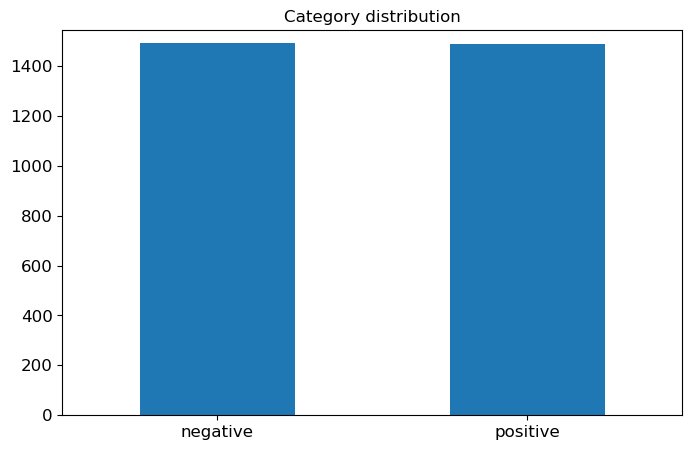

In [50]:
print(all_data.category.value_counts())
# plot barchart for all_data
upper_bound = max(all_data.category.value_counts() + 50) 
all_data.category.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, upper_bound],        
                                    rot = 0, fontsize = 12, figsize = (8,5))

negative    506
positive    494
Name: category, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

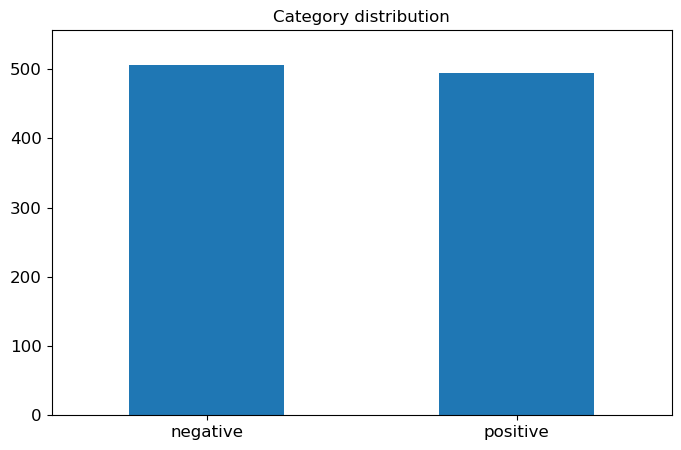

In [51]:
print(X_sample.category.value_counts())
# plot barchart for X_sample data
upper_bound = max(X_sample.category.value_counts() + 50) 
X_sample.category.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, upper_bound],        
                                    rot = 0, fontsize = 12, figsize = (8,5))

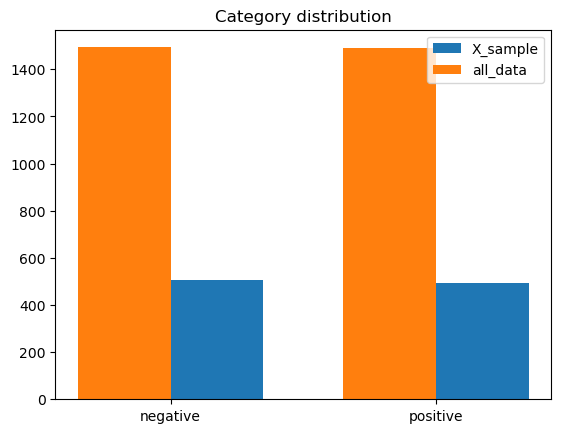

In [52]:
import numpy as np
import matplotlib.pyplot as plt

categories=["positive","negative"]
# 計算每個類別的數量
category_counts = all_data['category'].value_counts()
categories = category_counts.index.tolist()  # 類別名稱的列表
counts = category_counts.tolist()  # 相應計數的列表
category_counts_x = X_sample['category'].value_counts()
counts_x = category_counts_x.tolist()

bar_width=0.35
# 建立 x 軸位置的陣列
X_axis = np.arange(len(categories))

midpoints = X_axis + bar_width / 2
plt.xticks(midpoints, categories)

# 繪製長條圖
#plt.figure(figsize=(8,5))
plt.bar(X_axis+0.35, counts_x, bar_width, label='X_sample')
plt.bar(X_axis, counts, bar_width, label='all_data')

# 設定 x 軸標籤為類別名稱
plt.xticks(midpoints, categories)


plt.title("Category distribution")
plt.legend()

# 顯示圖表
plt.show()

### Feature Creation

In [53]:
all_data['unigrams'] = all_data['text'].apply(lambda x: dmh.tokenize_text(x))

In [54]:
all_data[0:5]

,text,label,category,unigrams
0,So there is no way for me to plug it in here i...,0,negative,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,positive,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,positive,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,negative,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,positive,"[The, mic, is, great, .]"


In [55]:
list(all_data[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

### Feature subset selection

In [56]:
count_vect = CountVectorizer()
all_data_counts = count_vect.fit_transform(all_data.text)
print(all_data_counts.shape)

(2983, 5155)


In [57]:
count_vect.get_feature_names()[0:20]

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



['00',
 '10',
 '100',
 '11',
 '12',
 '13',
 '15',
 '15g',
 '15pm',
 '17',
 '18',
 '18th',
 '1928',
 '1947',
 '1948',
 '1949',
 '1971',
 '1973',
 '1979',
 '1980']

In [58]:
# we convert from sparse array to normal array
all_data_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [59]:
vocabX_map_5n100 = pd.DataFrame(all_data_counts[0:5,0:100].toarray(),columns=count_vect.get_feature_names_out()[:100])
display(vocabX_map_5n100)

,00,10,100,11,12,13,15,15g,15pm,17,...,accessable,accessible,accessing,accessory,accessoryone,accident,accidentally,acclaimed,accolades,accommodations
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
#建立篩選條件
mask = vocabX_map_5n100.iloc[3,:] == 1
#print(mask)

#篩選資料並呈現答案
vocabX_answer = vocabX_map_5n100.loc[3,list(mask)]
print("Answer:",vocabX_answer.index)

Answer: Index(['45'], dtype='object')


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



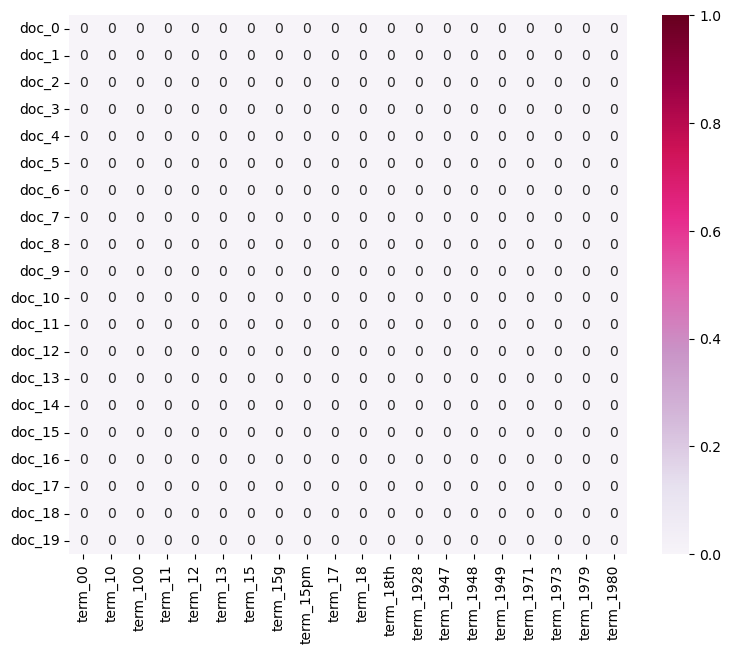

In [61]:
import seaborn as sns
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = all_data_counts[0:20, 0:20].toarray()


df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

,10,13,15,15g,2mp,350,375,45,510,680,...,any,anyway,apparently,appears,are,area,arguing,around,arrived,as
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
283,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
284,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
288,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(595.7222222222223, 0.5, 'Doc')

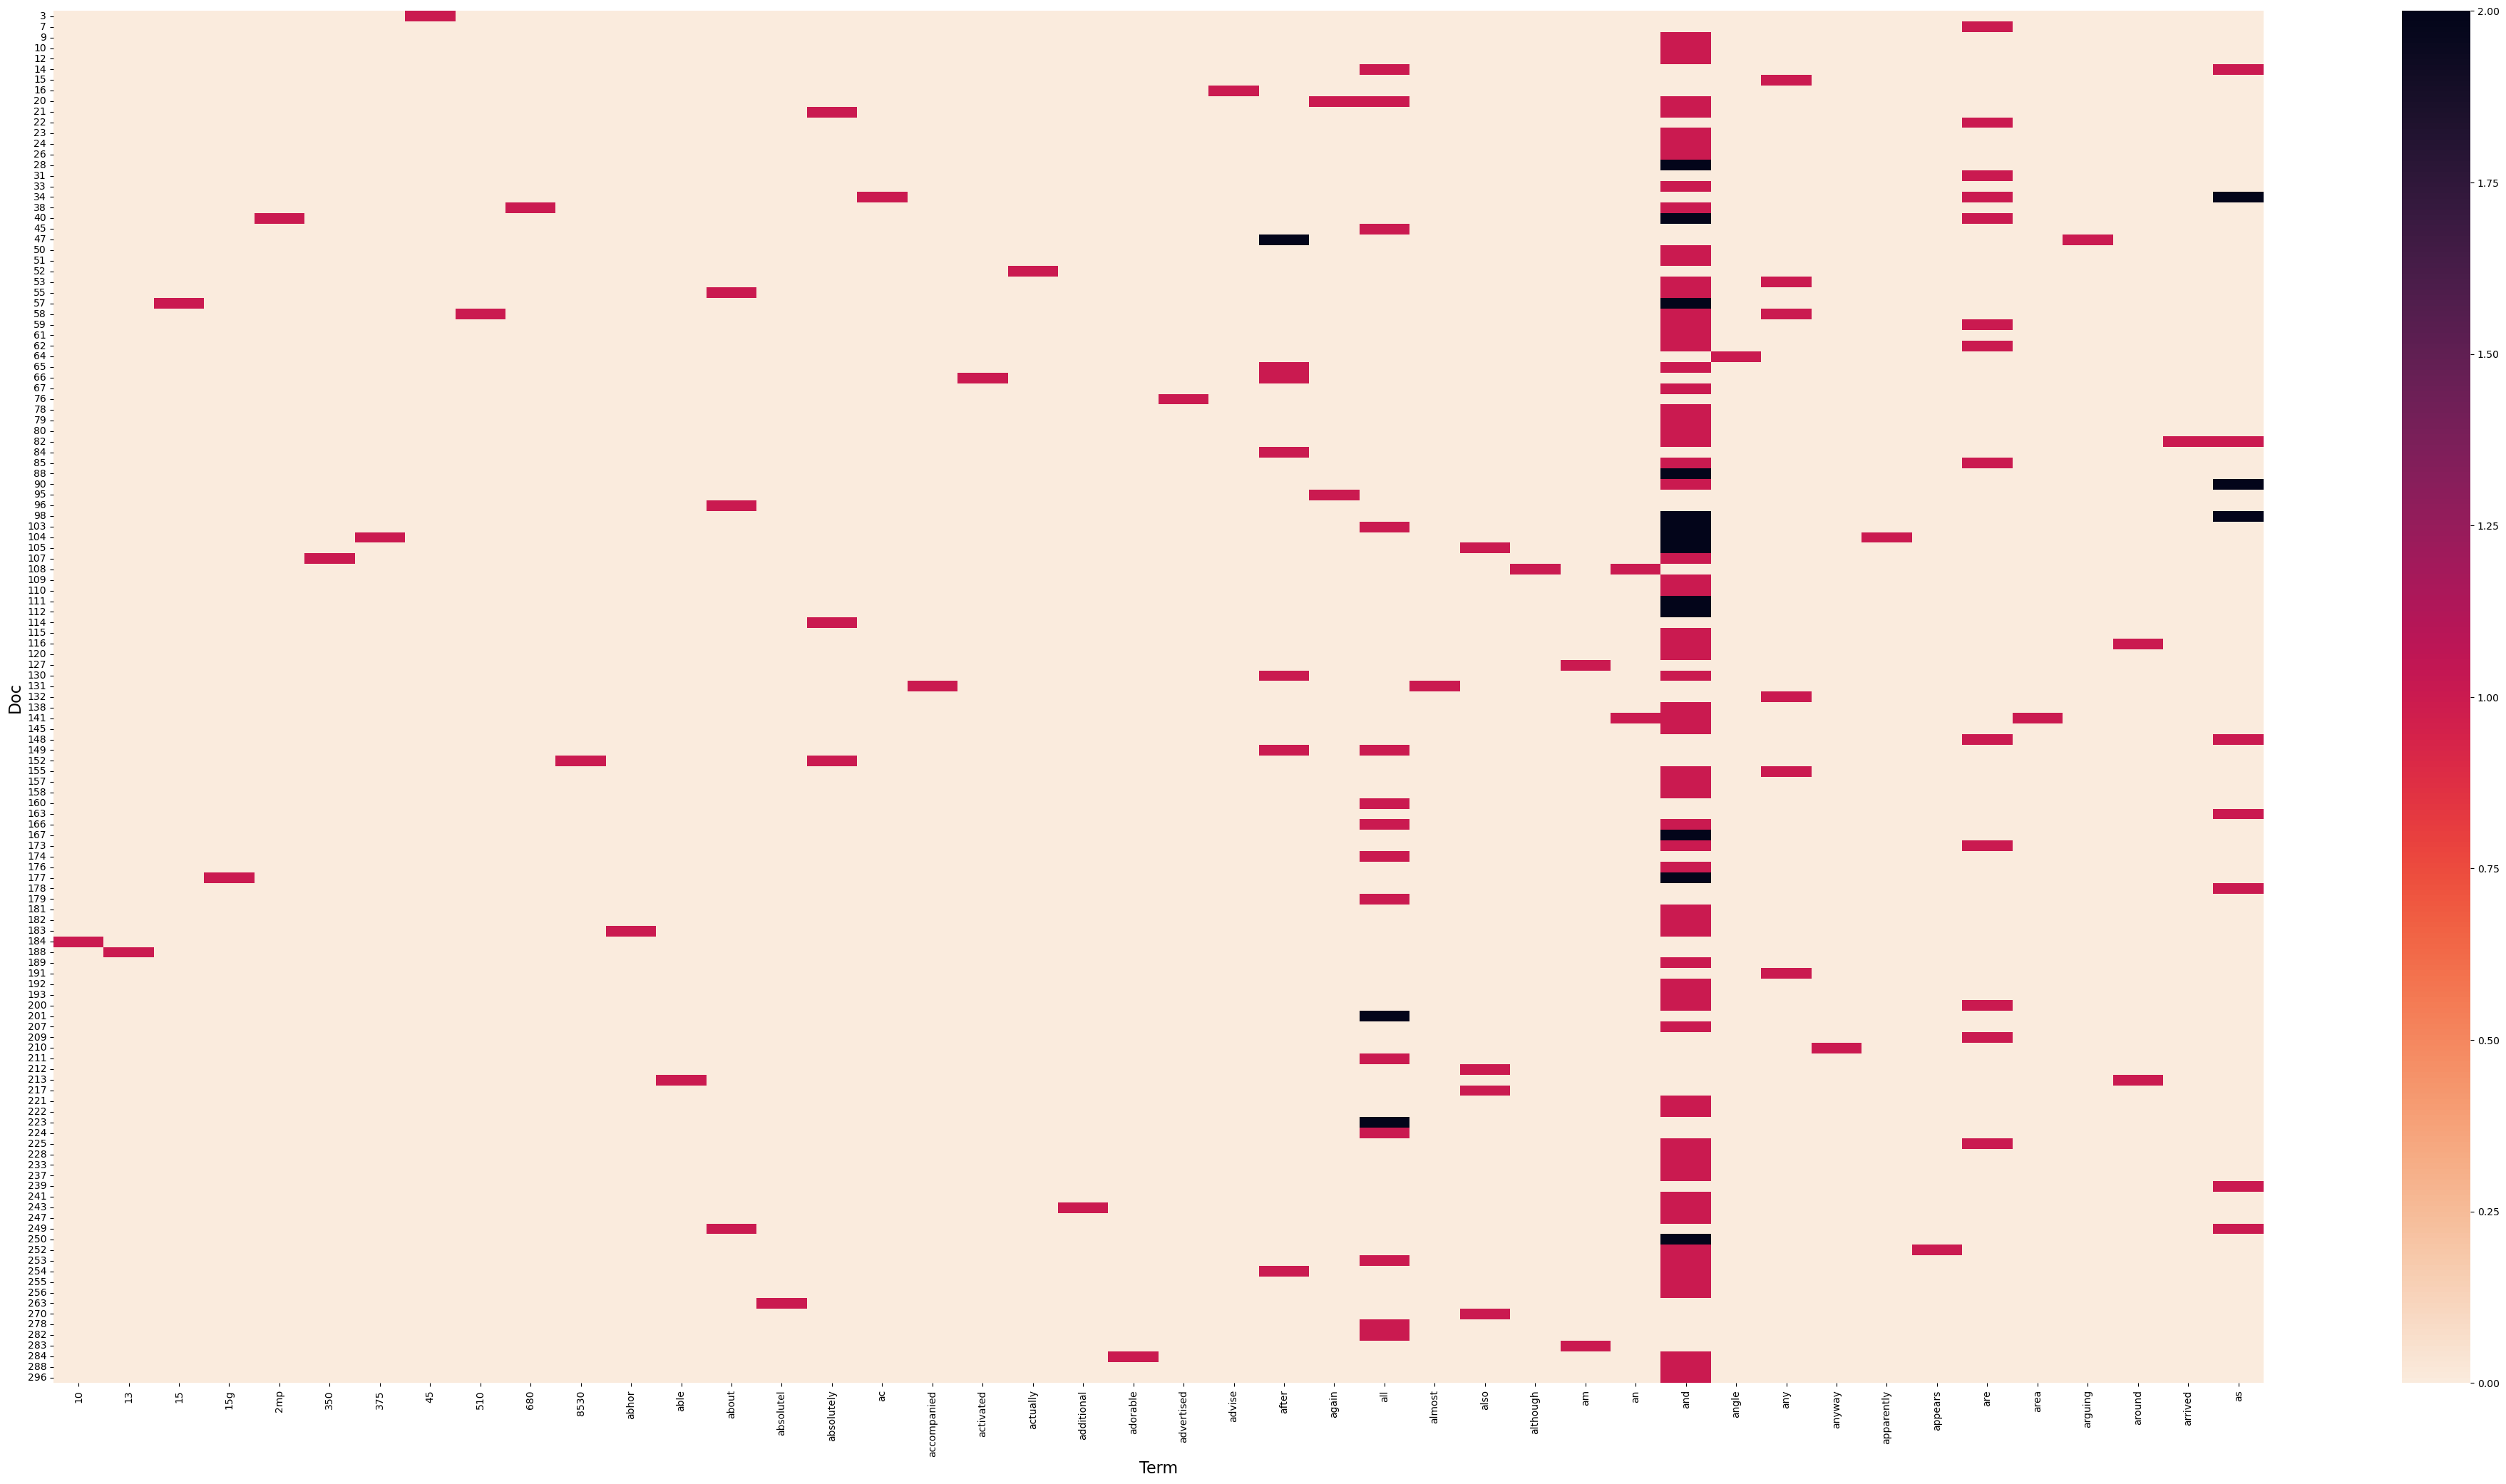

In [62]:
# 使用dataframe來操作
vocabX_map_300n300 = pd.DataFrame(all_data_counts[0:300, 0:300].toarray(), columns=count_vect.get_feature_names_out()[:300])
# display(vocabX_map_300n300)

# 計算每列的加總
column_sums = vocabX_map_300n300.sum(axis=0)  # axis=0 表示對每列進行加總

# 刪除加總為0的列
vocabX_map_300n300.drop(columns=column_sums[column_sums == 0].index, inplace=True)

# 計算每行的加總
row_sums = vocabX_map_300n300.sum(axis=1)  # axis=1 表示對每行進行加總

# 刪除加總為0的行
vocabX_map_300n300.drop(index=row_sums[row_sums == 0].index, inplace=True)

# 打印結果的 DataFrame
display(vocabX_map_300n300)
plt.subplots(figsize=(50, 25))
ax = sns.heatmap(vocabX_map_300n300,
                 cmap="rocket_r",
                 annot=False,xticklabels = True,  yticklabels = True)

# # 設置軸標題
ax.set_xlabel('Term',fontsize=16)
ax.set_ylabel('Doc',fontsize=16)

### Dimensionality Reduction

In [63]:
print(all_data_counts.shape)
X_reduced = PCA(n_components = 2).fit_transform(all_data_counts.toarray())
print(X_reduced.shape)

(2983, 5155)
(2983, 2)


In [64]:
categories

['negative', 'positive']

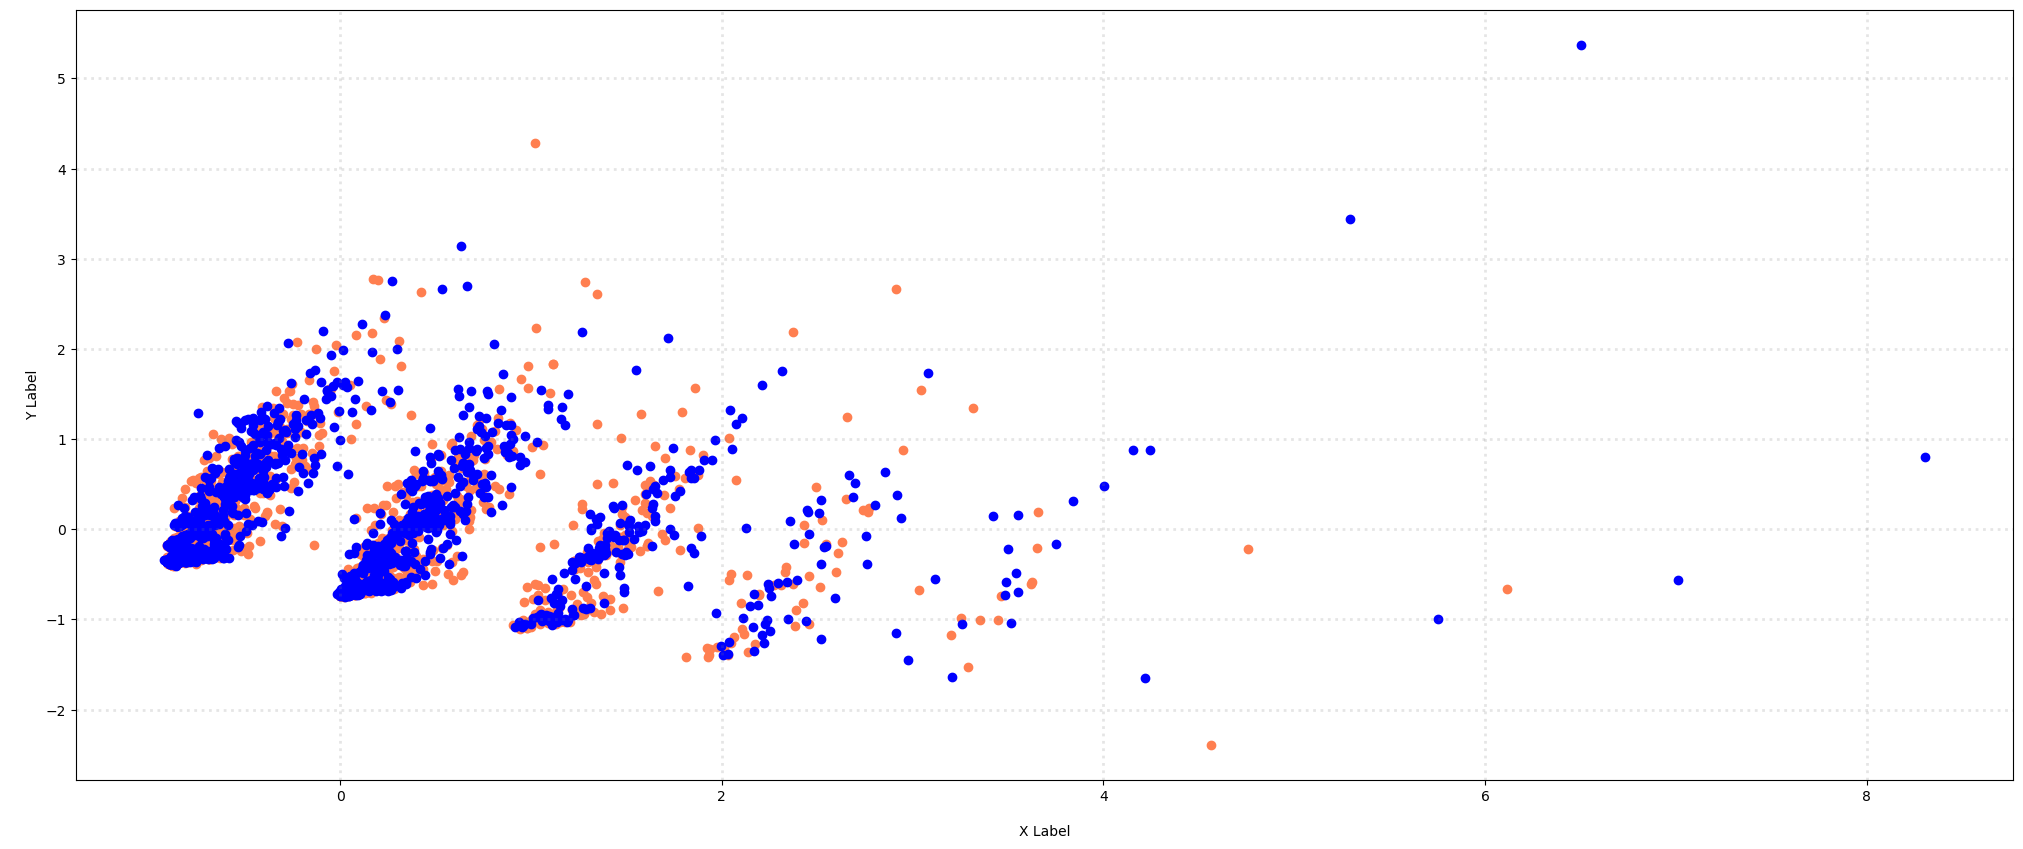

In [65]:
col = ['coral', 'blue']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[all_data['category'] == category].T[0]
    ys = X_reduced[all_data['category'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

In [66]:
from sklearn.decomposition import PCA
print(X_counts.shape)
X_reduced = PCA(n_components = 3).fit_transform(all_data_counts.toarray())
print(X_reduced.shape)

(2257, 35788)
(2983, 3)


### 角度1

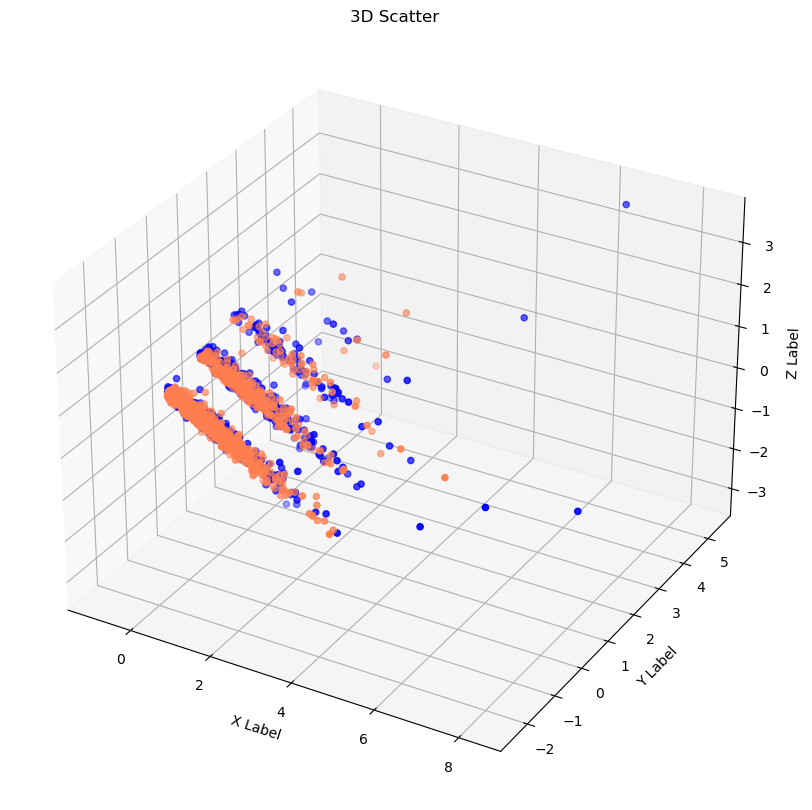

In [67]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

col = ['coral', 'blue']

# plot
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
for c, category in zip(col, categories):
    xs = X_reduced[all_data['category'] == category].T[0]
    ys = X_reduced[all_data['category'] == category].T[1]
    zs = X_reduced[all_data['category'] == category].T[2]

# 以三個不同角度繪製 3D 散點圖
    
    ax.view_init(30)  # 設定視角

    # 繪製 3D 散點圖
    ax.scatter(xs, ys, zs, c=c)

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.set_title(f'3D Scatter')

plt.show()

### 角度2

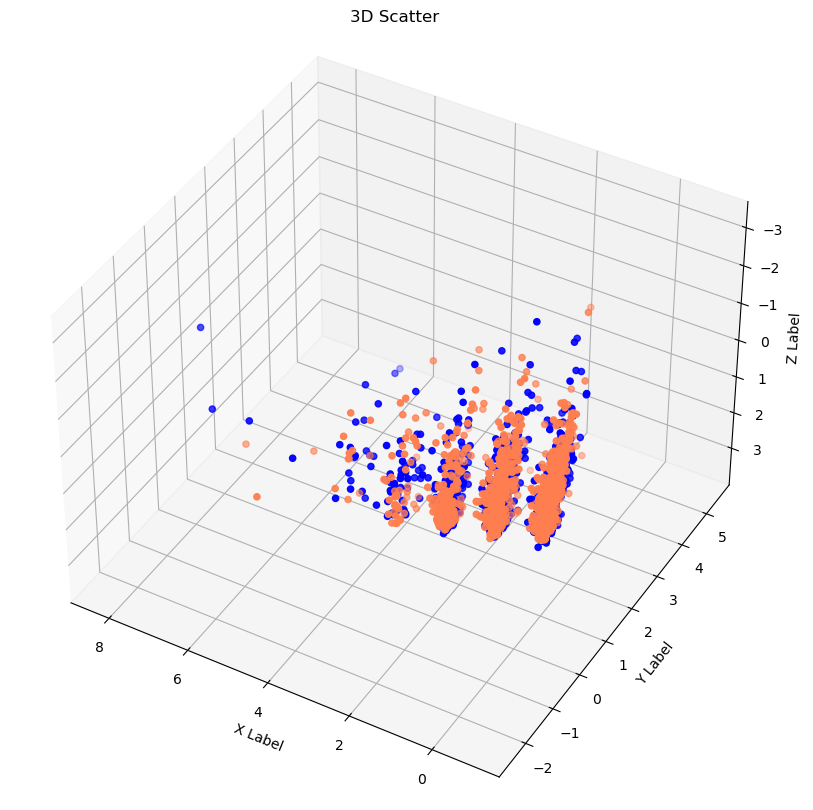

In [68]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

col = ['coral', 'blue']

# plot
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
for c, category in zip(col, categories):
    xs = X_reduced[all_data['category'] == category].T[0]
    ys = X_reduced[all_data['category'] == category].T[1]
    zs = X_reduced[all_data['category'] == category].T[2]

# 以三個不同角度繪製 3D 散點圖    
    ax.view_init(-140, 60)  # 設定視角

    # 繪製 3D 散點圖
    ax.scatter(xs, ys, zs, c=c)

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.set_title(f'3D Scatter')

plt.show()

### 角度3

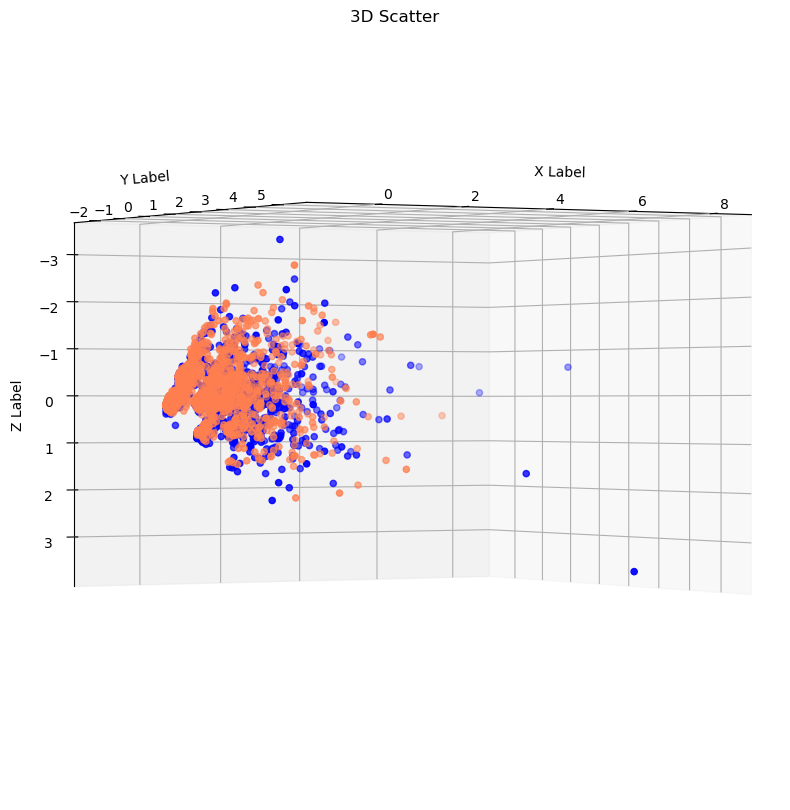

In [69]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

col = ['coral', 'blue']

# plot
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
for c, category in zip(col, categories):
    xs = X_reduced[all_data['category'] == category].T[0]
    ys = X_reduced[all_data['category'] == category].T[1]
    zs = X_reduced[all_data['category'] == category].T[2]

# 以三個不同角度繪製 3D 散點圖
    ax.view_init(180)  # 設定視角

    # 繪製 3D 散點圖
    ax.scatter(xs, ys, zs, c=c)

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.set_title(f'3D Scatter')

plt.show()

In [70]:
term_frequencies = np.asarray(all_data_counts.sum(axis=0))[0]

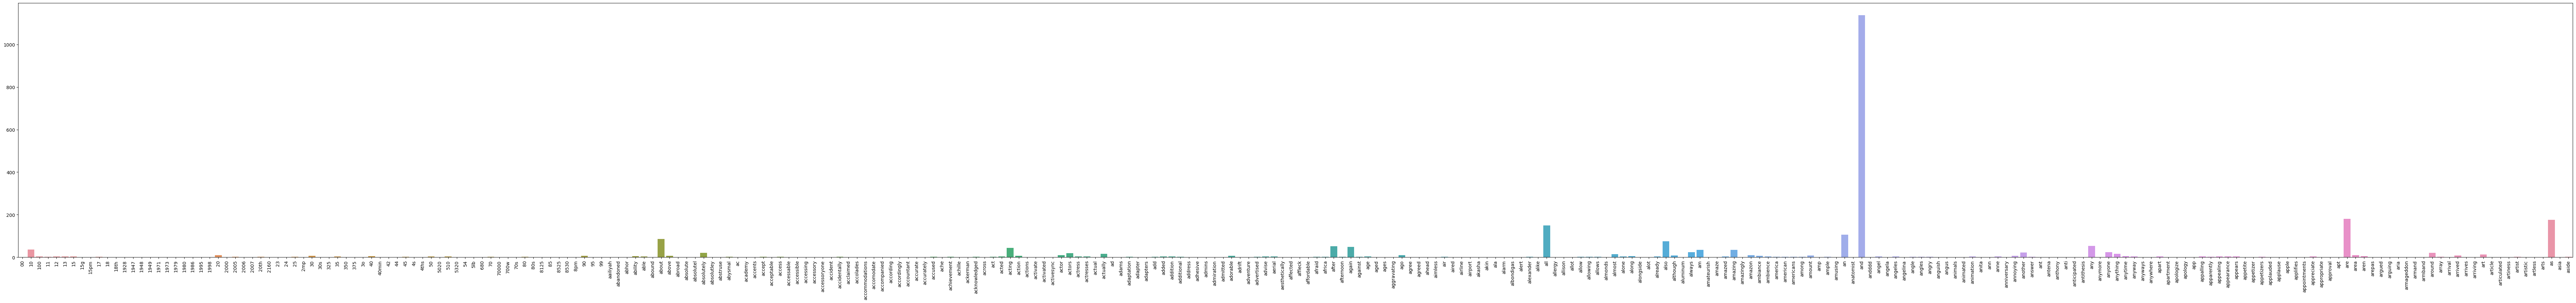

In [71]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [72]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [73]:
# Create a DataFrame for the top 300 terms and their frequencies
data = {
    'Terms': count_vect.get_feature_names_out()[:300],
    'Frequencies': term_frequencies[:300]
}

# Create a bar plot using Plotly
fig = px.bar(data, x='Terms', y='Frequencies', labels={'Frequencies': 'Frequency'}, title='Term Frequencies')

# Rotate x-axis labels for better readability
fig.update_layout(xaxis_tickangle=-45)

# Show the plot
fig.show()


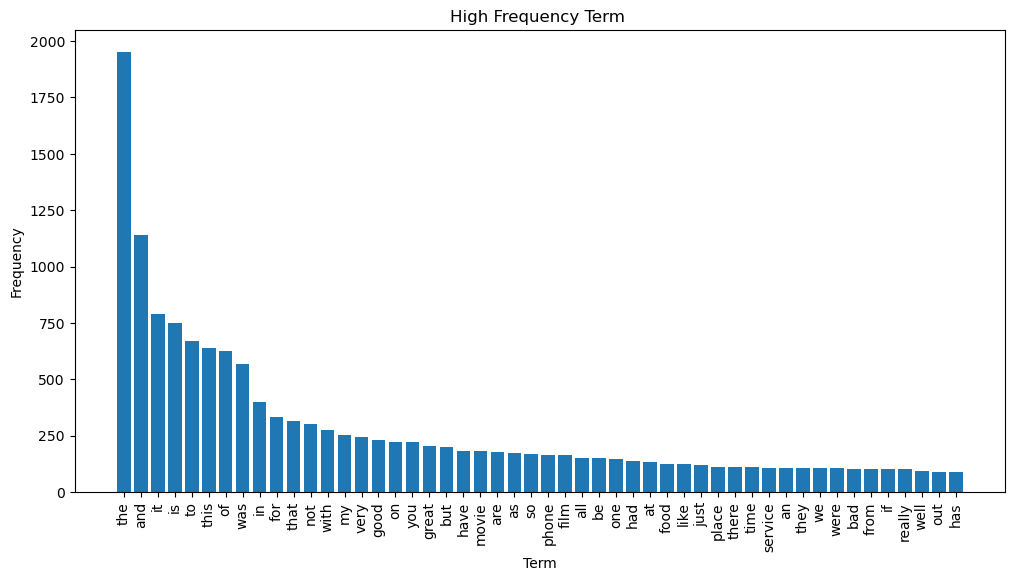

In [74]:
# 選擇50個高頻率出現單詞
num_high_frequency_terms = 50

terms = count_vect.get_feature_names_out()
frequencies = term_frequencies

# 根據頻率降冪排序
sorted_indices = sorted(range(len(frequencies)), key=lambda k: frequencies[k], reverse=True)
sorted_terms = [terms[i] for i in sorted_indices]
sorted_frequencies = [frequencies[i] for i in sorted_indices]

# 選擇高頻率單詞及其出現頻率
selected_terms = sorted_terms[:num_high_frequency_terms]
selected_frequencies = sorted_frequencies[:num_high_frequency_terms]

# 創建圖形
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(selected_terms, selected_frequencies)
plt.xlabel('Term')
plt.ylabel('Frequency')
plt.title('High Frequency Term ')
plt.xticks(rotation=90)
plt.show()


### Discretization and Binarization

In [75]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()
mlb.fit(all_data.category)
all_data['bin_category'] = mlb.transform(all_data['category']).tolist()

In [76]:
display(all_data)

,text,label,category,unigrams,bin_category
0,So there is no way for me to plug it in here i...,0,negative,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,positive,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1,positive,"[Great, for, the, jawbone, .]",[1]
3,Tied to charger for conversations lasting more...,0,negative,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,positive,"[The, mic, is, great, .]",[1]
...,...,...,...,...,...
2978,I think food should have flavor and texture an...,0,negative,"[I, think, food, should, have, flavor, and, te...",[0]
2979,Appetite instantly gone.,0,negative,"[Appetite, instantly, gone, .]",[0]
2980,Overall I was not impressed and would not go b...,0,negative,"[Overall, I, was, not, impressed, and, would, ...",[0]
2981,"The whole experience was underwhelming, and I ...",0,negative,"[The, whole, experience, was, underwhelming, ,...",[0]


### Data Exploration

In [77]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = all_data.iloc[25]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = all_data.iloc[50]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = all_data.iloc[100]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [78]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['Great Pocket PC / phone combination.']
["Not loud enough and doesn't turn on like it should."]
['Integrated seamlessly with the Motorola RAZR phone.']


In [79]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)
print(document_vector_count_1)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)
print(document_vector_count_1_bin)
# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

  (0, 889)	1
  (0, 2023)	1
  (0, 3271)	1
  (0, 3322)	1
  (0, 3393)	1
  (0, 889)	1
  (0, 2023)	1
  (0, 3271)	1
  (0, 3322)	1
  (0, 3393)	1
Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [80]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)
# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.169031
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


# Third

### New Dataset Visualization

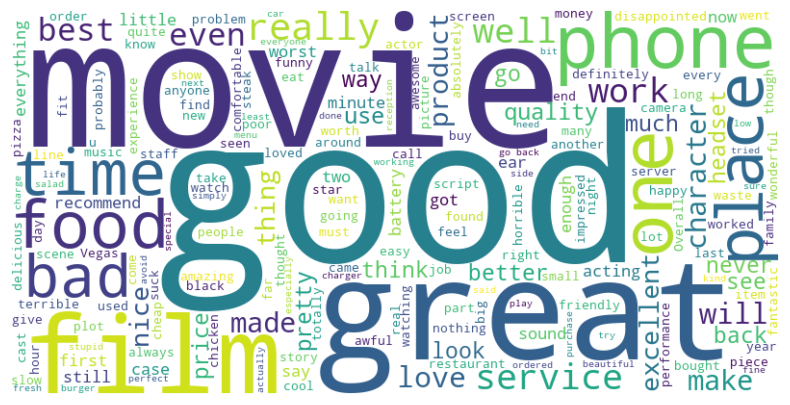

In [81]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

all_text = " ".join(comment for comment in all_data['text'])

# 創建詞雲圖
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


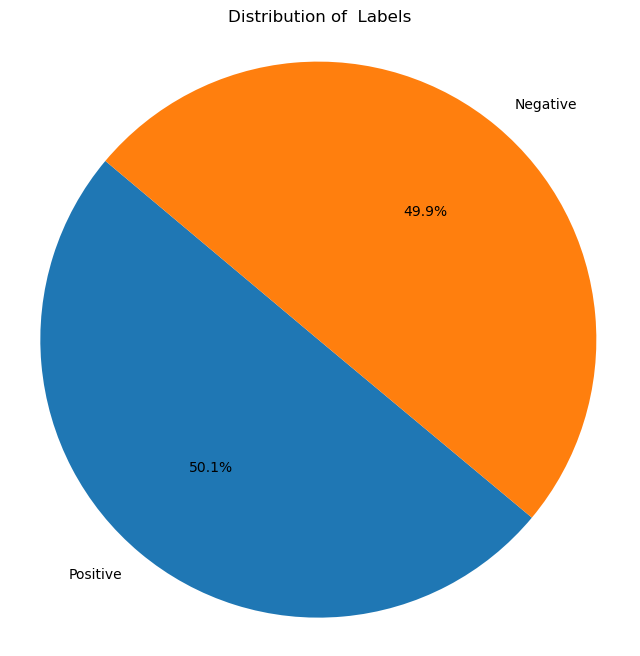

In [82]:
labels = ['Positive', 'Negative']
sizes = [len(all_data[all_data["label"]==0]), len(all_data[all_data["label"]==1])]  # 假设有1200个正面评论和800个负面评论

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  


plt.title('Distribution of  Labels')


plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


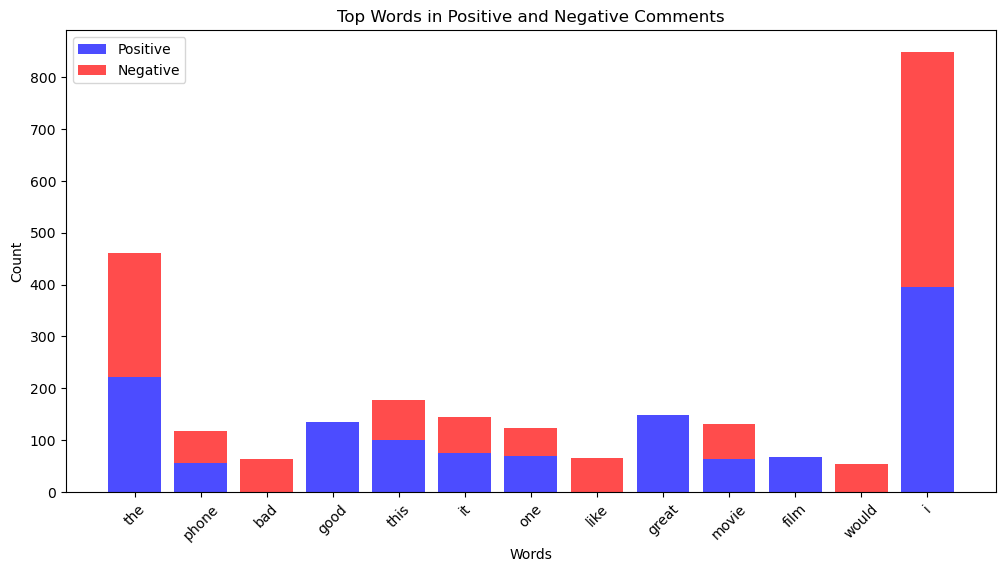

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import string

nltk.download('stopwords')
# 停用詞和標點符號
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

#設定正面和負面評價df
positive_comments = all_data[all_data['label'] == 1]['text']
negative_comments = all_data[all_data['label'] == 0]['text']

def preprocess_text(comment):
    # 去除停停用詞和標點符號，轉為小寫
    comment = ' '.join(word.lower() for word in comment.split() if word not in stop_words and word not in punctuation)
    return comment

positive_comments = positive_comments.apply(preprocess_text)
negative_comments = negative_comments.apply(preprocess_text)

# 單字頻率
def get_top_words(comment_series, top_n=10):
    all_words = ' '.join(comment_series)
    words = all_words.split()
    word_counts = Counter(words)
    top_words = dict(word_counts.most_common(top_n))
    return top_words

# 獲取正面評論中最常見的單詞
top_positive_words = get_top_words(positive_comments)
sorted_top_positive_words = dict(sorted(top_positive_words.items(), key=lambda item: item[1], reverse=True))


# 獲取負面評論中最常見的單詞
top_negative_words = get_top_words(negative_comments)


# 獲取所有單詞的集合
all_words = list(set(list(top_positive_words.keys()) + list(top_negative_words.keys())))


fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(all_words, [top_positive_words.get(word, 0) for word in all_words], label='Positive', color='b', alpha=0.7)
ax.bar(all_words, [top_negative_words.get(word, 0) for word in all_words], bottom=[top_positive_words.get(word, 0) for word in all_words], label='Negative', color='r', alpha=0.7)
ax.set_xlabel('Words')
ax.set_ylabel('Count')
ax.set_title('Top Words in Positive and Negative Comments')
ax.legend()
ax.set_xticks(list(all_words))
ax.set_xticklabels(list(all_words), rotation=45)

plt.show()

### TF-IDF

In [86]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Word Frequency
count_vect = CountVectorizer()
all_data_counts = count_vect.fit_transform(all_data.text)
print(all_data_counts.shape)
print('-----Count-----')
print('all_data:', all_data_counts.shape)
print(all_data_counts[0])

# TF-IDF
tfidf_vect = TfidfVectorizer()
all_data_tfidf = tfidf_vect.fit_transform(all_data.text)
print('-----TDIDF-----')
print('all_data:', all_data_tfidf.shape)
print(all_data_tfidf[0])

(2983, 5155)
-----Count-----
all_data: (2983, 5155)
  (0, 4161)	1
  (0, 4545)	1
  (0, 2427)	1
  (0, 3043)	1
  (0, 4987)	1
  (0, 1829)	1
  (0, 2809)	1
  (0, 4609)	1
  (0, 3387)	1
  (0, 2432)	1
  (0, 2314)	2
  (0, 2158)	1
  (0, 4531)	1
  (0, 4835)	1
  (0, 4793)	1
  (0, 1982)	1
  (0, 647)	1
  (0, 1013)	1
-----TDIDF-----
all_data: (2983, 5155)
  (0, 1013)	0.39845543988934873
  (0, 647)	0.2233655373587691
  (0, 1982)	0.2314910330235545
  (0, 4793)	0.3319671168188344
  (0, 4835)	0.2754374241479848
  (0, 4531)	0.08660987696634037
  (0, 2158)	0.22274667474668547
  (0, 2314)	0.29538734318239734
  (0, 2432)	0.11967447562998453
  (0, 3387)	0.30868158568324194
  (0, 4609)	0.12743956571028017
  (0, 2809)	0.2286268276414034
  (0, 1829)	0.15641232030594823
  (0, 4987)	0.24912754996231995
  (0, 3043)	0.2233655373587691
  (0, 2427)	0.12068879835601415
  (0, 4545)	0.20758518394408282
  (0, 4161)	0.1873972955866557


In [87]:
frequency_result = pd.DataFrame(all_data_counts.toarray(), columns = count_vect.get_feature_names())
TF_IDF_result = pd.DataFrame(all_data_tfidf.toarray(), columns = tfidf_vect.get_feature_names())
frequency_result['label']= all_data['label']
TF_IDF_result['label']= all_data['label']

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [88]:
frequency_result

,00,10,100,11,12,13,15,15g,15pm,17,...,yukon,yum,yummy,yun,z500a,zero,zillion,zombie,zombiez,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2978,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2979,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2980,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2981,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Naive Bayes

### BernoulliNB

In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import BernoulliNB

# 切分 word frequency 的 train、test資料
train_data, test_data = train_test_split(frequency_result, test_size=0.2, random_state=42)
print('train:', train_data.shape)
print('test:', test_data.shape)
# 切分  tf-idf 的 train、test資料
train_f_data, test_f_data = train_test_split(TF_IDF_result, test_size=0.2, random_state=42)
print('train:', train_f_data.shape)
print('test:', test_f_data.shape)

# word frequency
clf = BernoulliNB()
clf.fit(train_data.drop(["label"],axis=1), train_data['label'])
y_pred_count = clf.predict(test_data.drop(["label"],axis=1))
print('-----Count-----')
print(accuracy_score(test_data["label"], y_pred_count))
print(classification_report(test_data["label"], y_pred_count))

# tf-idf
clf = BernoulliNB()
clf.fit(train_f_data.drop(["label"],axis=1), train_f_data['label'])
y_pred_tfidf = clf.predict(test_f_data.drop(["label"],axis=1))
print('-----Tfidf-----')
print(accuracy_score(test_f_data["label"], y_pred_tfidf))
print(classification_report(test_f_data["label"], y_pred_tfidf))

train: (2386, 5156)
test: (597, 5156)
train: (2386, 5156)
test: (597, 5156)
-----Count-----
0.8241206030150754
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       307
           1       0.82      0.82      0.82       290

    accuracy                           0.82       597
   macro avg       0.82      0.82      0.82       597
weighted avg       0.82      0.82      0.82       597

-----Tfidf-----
0.8241206030150754
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       307
           1       0.82      0.82      0.82       290

    accuracy                           0.82       597
   macro avg       0.82      0.82      0.82       597
weighted avg       0.82      0.82      0.82       597



### MultinomialNB()

In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# word frequency
clf = MultinomialNB()
clf.fit(train_data.drop(["label"],axis=1), train_data['label'])
y_pred_count = clf.predict(test_data.drop(["label"],axis=1))

accuracy = accuracy_score(test_data["label"], y_pred_count)
report = classification_report(test_data["label"], y_pred_count)
print('-----Count-----')
print('Accuracy:', accuracy)
print('Classification Report:')
print(report)

# tf-idf
clf = MultinomialNB()
clf.fit(train_f_data.drop(["label"],axis=1), train_f_data['label'])
y_pred_tfidf = clf.predict(test_f_data.drop(["label"],axis=1))
print('-----Tfidf-----')
print(accuracy_score(test_f_data["label"], y_pred_tfidf))
print(classification_report(test_f_data["label"], y_pred_tfidf))


-----Count-----
Accuracy: 0.8241206030150754
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       307
           1       0.82      0.82      0.82       290

    accuracy                           0.82       597
   macro avg       0.82      0.82      0.82       597
weighted avg       0.82      0.82      0.82       597

-----Tfidf-----
0.8274706867671692
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       307
           1       0.82      0.83      0.82       290

    accuracy                           0.83       597
   macro avg       0.83      0.83      0.83       597
weighted avg       0.83      0.83      0.83       597



### TF-IDF and Word Frequency Diffrence

##### 目前推論可能原因為，因 TF-IDF之原理為計算各個單字在文章中出現幾次，但會針對較常出現在不同篇文章中的單字在乘上權重，目的是為了降地常出現的語助詞比重(例:is,am,are)，而此樣本集的text皆為一句話評論，針對這種詞語出現的比例可能沒有那麼高，加上Naive Bayes模型較為簡單(相較於XGBoost等模型)，導致使用 TF-IDF 及單純使用 word frequency 時，跑 Naive Bayes 模型的準確率結果差不多。

In [91]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# word frequency
clf = RandomForestClassifier()
clf.fit(train_data.drop(["label"],axis=1), train_data['label'])
y_pred_count = clf.predict(test_data.drop(["label"],axis=1))

accuracy = accuracy_score(test_data["label"], y_pred_count)
report = classification_report(test_data["label"], y_pred_count)
print('-----Count-----')
print('Accuracy:', accuracy)
print('Classification Report:')
print(report)

# tf-idf
clf = RandomForestClassifier()
clf.fit(train_f_data.drop(["label"],axis=1), train_f_data['label'])
y_pred_tfidf = clf.predict(test_f_data.drop(["label"],axis=1))
print('-----Tfidf-----')
print(accuracy_score(test_f_data["label"], y_pred_tfidf))
print(classification_report(test_f_data["label"], y_pred_tfidf))


-----Count-----
Accuracy: 0.8140703517587939
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.82       307
           1       0.80      0.82      0.81       290

    accuracy                           0.81       597
   macro avg       0.81      0.81      0.81       597
weighted avg       0.81      0.81      0.81       597

-----Tfidf-----
0.8107202680067002
              precision    recall  f1-score   support

           0       0.82      0.81      0.82       307
           1       0.80      0.81      0.81       290

    accuracy                           0.81       597
   macro avg       0.81      0.81      0.81       597
weighted avg       0.81      0.81      0.81       597



In [92]:
# XGBoost
from xgboost import XGBClassifier

# word frequency
clf = XGBClassifier()
clf.fit(train_data.drop(["label"],axis=1), train_data['label'])
y_pred_count = clf.predict(test_data.drop(["label"],axis=1))

accuracy = accuracy_score(test_data["label"], y_pred_count)
report = classification_report(test_data["label"], y_pred_count)
print('-----Count-----')
print('Accuracy:', accuracy)
print('Classification Report:')
print(report)

# tf-idf
clf = XGBClassifier()
clf.fit(train_f_data.drop(["label"],axis=1), train_f_data['label'])
y_pred_tfidf = clf.predict(test_f_data.drop(["label"],axis=1))
print('-----Tfidf-----')
print(accuracy_score(test_f_data["label"], y_pred_tfidf))
print(classification_report(test_f_data["label"], y_pred_tfidf))

-----Count-----
Accuracy: 0.8056951423785594
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       307
           1       0.82      0.77      0.79       290

    accuracy                           0.81       597
   macro avg       0.81      0.80      0.81       597
weighted avg       0.81      0.81      0.81       597

-----Tfidf-----
0.7889447236180904
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       307
           1       0.79      0.78      0.78       290

    accuracy                           0.79       597
   macro avg       0.79      0.79      0.79       597
weighted avg       0.79      0.79      0.79       597



#### 經過套用RandomForest及XGBoost驗證，唯XGBoost對預測準確率有較明顯之影響，所以推估模型的影響可能不是非常大

# Fourth

## More meaningful visualizations

#### 有些視覺化圖形的意義不大，有很多使用頻率很低的單字也會被包括在圖形中，會沒辦法有效看到高頻率的單字，我們可以設定閾值及篩選機制，將超過特定閾值之單字選出來繪圖。

#### 而對於單字量較多的圖形，能多使用互動式圖表來展現

## Sampling not meaningful

### 在分類問題中，若有更多的樣本能幫助模型更好的判斷，也許在此資料集，抽樣是不需要的